<h2><center><font color=#D40004><u>One vs One - Polynomial transformation with Pocket </u></font></center></h2>
<h3><center>Groupe: Mohammed NECHBA, Yassine SEDJARI, Mohammed MOUHAJIR </center></h3>
<center> 2st year Artificial Intelligence Engineering student at ENSIAS Rabat (Morocco) </center>
<br> 
<center> Prof. Abdellatif EL AFIA</center>

# <font color='green'><u> Table of Contents:</u></font> <br>

1. [Importing/Loading & checking the data.](#1)
1. [Polynomial transformation.](#2)
1. [Pocket.](#3)
1. [Training & Testing for data linear separable.](#4)
1. [Training & Testing for data linear separable noise.](#5)
1. [Training & Testing for data no linear separable.](#6)

<a id = "1"></a><br>
# <font color="green"><u> I. Importing/Loading & Visualize the data:</u></font>

In [1]:
# numpy pour les opérations d'algébre linéaire sur les vecteurs et les matrices.
import numpy as np
# calculations
import math
# plotting vizualisation
import matplotlib.pyplot as plt
# pandas for read dataset
import pandas as pd
#plt.style.use('dark_background')

In [2]:
df_l_s = pd.read_csv("linearly_separable.csv")
df_l_s_n = pd.read_csv("linearly_separable_noise.csv")
df_n_l_s = pd.read_csv("no_linearly_separable.csv")

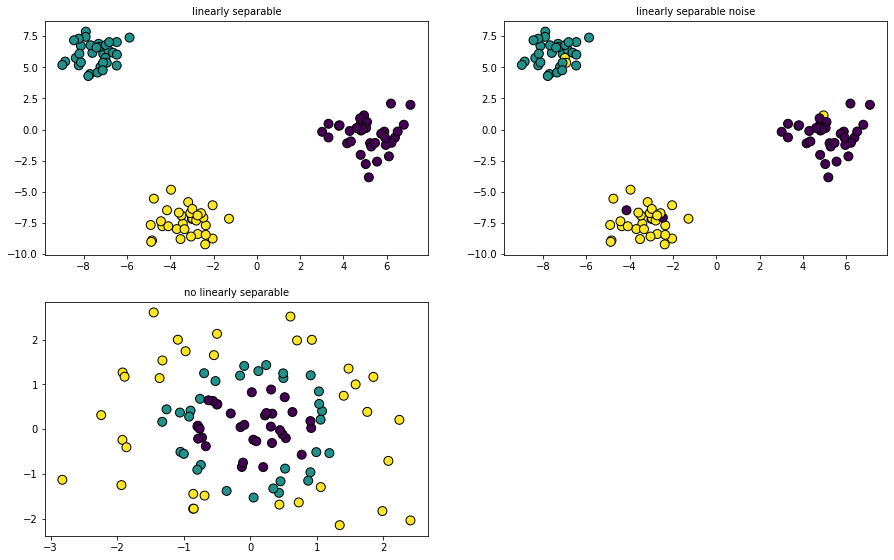

In [3]:
fig= plt.figure(figsize=(13, 13))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("linearly separable", fontsize="medium")
X1, Y1 = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(322)
plt.title("linearly separable noise", fontsize="medium")
X1, Y1 = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(323)
plt.title("no linearly separable", fontsize="medium")
X2, Y2 =df_n_l_s[['x1','x2']].to_numpy(), df_n_l_s['y'].to_numpy()
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=80, edgecolor="k")


In [4]:
def plot2D( X,y,w_list):
    x1=[]
    y1=[]
    for point in X:
        x1.append(point[0])
        y1.append(point[1])
    colors = y
    
    fig=plt.figure(figsize=(12,8))
    plt.scatter(x1, y1, s=100 ,c=colors, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    i=0
    for w in w_list:
        alpha = -w[1]/w[2]
        beta = -w[0]/w[2]
        decision_boundary = lambda x : alpha*x + beta
        if i==1:
            x2 = np.array([-3,2])
        else:
            x2 = np.array([-9,6])
            
                          
        y2 = decision_boundary(x2)
        plt.plot(x2,y2,label = "classifier "+str(i))
        i+=1
    plt.legend()


<a id = "2"></a><br>
# <font color="green"><u> II.Polynomial transformation:</u></font>

In [5]:
from itertools import chain, combinations
from itertools import combinations_with_replacement as combinations_w_r

def PolynomialExpansion(
        
        X, max_degree ,min_degree=0):
        
        """
        
        Parameters :
        ------------
        
        X : the input matrix that contains all examples , of shape(#exapmles , #features)
        
        
        """
        
        n_features= X.shape[1]
        n_examples= X.shape[0]
        
        # combinations_w_r  = combination with repitition (=in french : "arrangement avec répétiton")
        
        comb = combinations_w_r
        start = 1
        
        iter = chain.from_iterable(
            comb(range(n_features), i) for i in range(start, max_degree + 1)
        )
        
        #convert the 'iter' into a list
        
        list_combinations =list(iter)
        
        print("the combinations are  = ", list_combinations)
        print("len(list_iter)=", len( list_combinations) )
        print()
        
        XP=np.zeros( [n_examples,len(list_combinations)] )
    
        
     
        
        for i, comb in enumerate(list_combinations):
               """print("hello we are in for loop of Polynomial expension ")
               print("comb = ",comb)
               print("X[:,comb].prod(1) = ", X[:,comb].prod(1))"""
               XP[:, i] = X[:, comb].prod(1)
        
        #now we'll add the bias term
        XP=np.insert(XP,0,1,axis=1)
        print("we have finished the polynomial expension")
        return XP


<a id = "3"></a><br>
# <font color="green"><u> III.Pocket:</u></font>

In [6]:
def _get_cls_map( y):
    return np.where(y <= 0, -1, 1)

def indecatrice( w, x, y):
        if np.sign(np.dot(w,x))!=y :
            return 1
        return 0
def Ls( w, x, y):
        n = len(y)
        s=0
        for i in range(n):
            s+= indecatrice( w,x[i],y[i])
        return s/n
def Pocket( w0, X, y, max_iter):
    y = _get_cls_map(y)
    wt = w0.copy()
    for j in range(max_iter):
        
        for i in range(len(y)):
            #i=random.random()
            estimator = np.dot(wt,X[i])
            if np.sign(estimator) < 0 and y[i]>0:
                wt+= X[i]
            elif np.sign(estimator) > 0 and y[i]<0:
                wt-= X[i]
            if Ls(wt, X, y)<Ls(w0, X, y) :
                w0 = wt.copy()
        
    #Assigner les valeurs optimales
    return w0
    


<a id = "4"></a><br>
# <font color="green"><u> IV. Training & Testing for data linear separable:</u></font>

> ## Training

In [7]:
x, y = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()

In [8]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [9]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [10]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [11]:
df_x=  pd.DataFrame(X,columns=['x0','x1','x2'])
df_y=pd.DataFrame(y,columns=['y'])
df =  pd.concat([df_x,df_y], axis=1)

In [12]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
k=0
for i in range(0, numLabels):
    for j in range(i+1,numLabels):
        df_i_j = df.loc[((df.y==i)+(df.y==j))]
        y_ =  df_i_j['y'].to_numpy()
        label = (y_ == j).astype(int)
        X_ =  df_i_j[['x0','x1','x2']].to_numpy()
        initial_w = np.ones(X.shape[1])
        classifiers[k, :] = Pocket(initial_w, X_, label, max_iter=8)
        k+=1

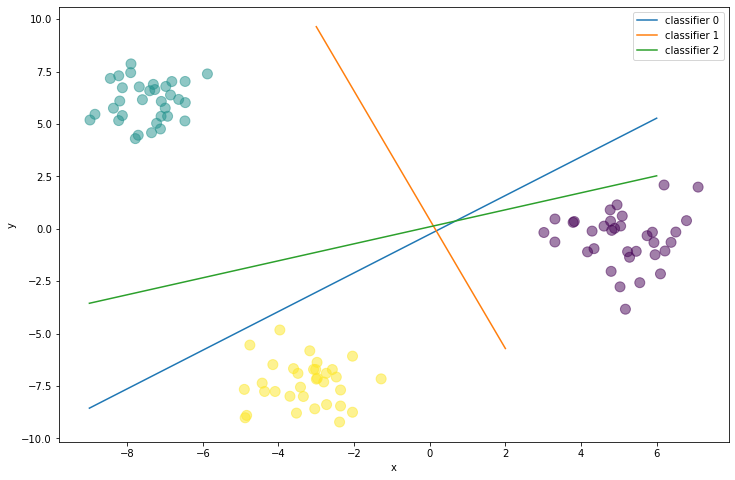

In [13]:
plot2D( x,y,classifiers)

>## Predictions

In [14]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [15]:
predictions=[]
for val in classProbabilities:
    if(val[0]<0 and val[1]<0):
        predictions.append(0)
    elif val[1]>0 and val[2]>0:
        predictions.append(2)
    else :
        predictions.append(1)

>## Accuracy

In [16]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 100.0%


<a id = "5"></a><br>
# <font color="green"><u> V. Training & Testing for data linear separable noise:</u></font>

> ## Training

In [17]:
x, y = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()

In [18]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [19]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [20]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [21]:
df_x=  pd.DataFrame(X,columns=['x0','x1','x2'])
df_y=pd.DataFrame(y,columns=['y'])
df =  pd.concat([df_x,df_y], axis=1)

In [22]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
k=0
for i in range(0, numLabels):
    for j in range(i+1,numLabels):
        df_i_j = df.loc[((df.y==i)+(df.y==j))]
        y_ =  df_i_j['y'].to_numpy()
        label = (y_ == j).astype(int)
        X_ =  df_i_j[['x0','x1','x2']].to_numpy()
        initial_w = np.ones(X.shape[1])
        classifiers[k, :] = Pocket(initial_w, X_, label, max_iter=8)
        k+=1

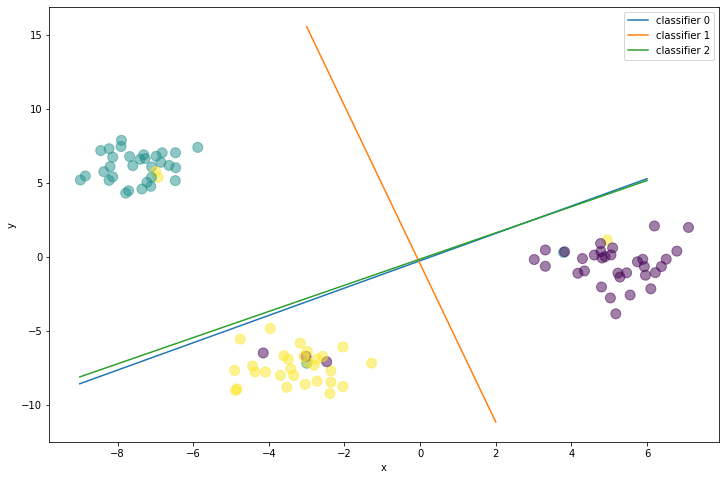

In [23]:
plot2D( x,y,classifiers)

>## Predictions

In [24]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [25]:
predictions=[]
for val in classProbabilities:
    if(val[0]<0 and val[1]<0):
        predictions.append(0)
    elif val[1]>0 and val[2]>0:
        predictions.append(2)
    else :
        predictions.append(1)

>## Accuracy

In [26]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 92.0%


<a id = "6"></a><br>
# <font color="green"><u> VI. Training & Testing for data no linear separable :</u></font>

> ## Training

In [27]:
x, y = df_n_l_s[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()

In [28]:
X = PolynomialExpansion( x, 3)

the combinations are  =  [(0,), (1,), (0, 0), (0, 1), (1, 1), (0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1)]
len(list_iter)= 9

we have finished the polynomial expension


In [29]:
numFeatures = X.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [30]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures ))

In [31]:
df_x=  pd.DataFrame(X)
df_y=pd.DataFrame(y,columns=['y'])
df =  pd.concat([df_x,df_y], axis=1)

In [32]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
k=0
for i in range(0, numLabels):
    for j in range(i+1,numLabels):
        df_i_j = df.loc[((df.y==i)+(df.y==j))]
        y_ =  df_i_j['y'].to_numpy()
        label = (y_ == j).astype(int)
        X_ =  df_i_j.drop(columns='y').to_numpy()
        initial_w = np.ones(X.shape[1])
        classifiers[k, :] = Pocket(initial_w, X_, label, max_iter=8)
        k+=1

>## Predictions

In [33]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [34]:
predictions=[]
for val in classProbabilities:
    if(val[0]<0 and val[1]<0):
        predictions.append(0)
    elif val[1]>0 and val[2]>0:
        predictions.append(2)
    else :
        predictions.append(1)

>## Accuracy

In [35]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 49.0%
